In [1]:
# Let's import the pandas, numpy libraries as pd, and np respectively. 
!pip install openpyxl
import pandas as pd
import numpy as np

# import matplotlib
import matplotlib.pyplot as plt

In [2]:
# First, make a variable called url_LondonHousePrices, and assign it the following link, enclosed in quotation-marks as a string:
# https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls

url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

# The dataset we're interested in contains the Average prices of the houses, and is actually on a particular sheet of the Excel file. 
# As a result, we need to specify the sheet name in the read_excel() method.
# Put this data into a variable called properties.  
properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None)

In [3]:
# Explore dataframe
print(properties.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            365 non-null    datetime64[ns]
 1   City of London        366 non-null    object        
 2   Barking & Dagenham    366 non-null    object        
 3   Barnet                366 non-null    object        
 4   Bexley                366 non-null    object        
 5   Brent                 366 non-null    object        
 6   Bromley               366 non-null    object        
 7   Camden                366 non-null    object        
 8   Croydon               366 non-null    object        
 9   Ealing                366 non-null    object        
 10  Enfield               366 non-null    object        
 11  Greenwich             366 non-null    object        
 12  Hackney               366 non-null    object        
 13  Hammersmith & Fulham

In [4]:
# set timeframe to evaluate, two decades ending May 2025
Begin_Date = pd.Timestamp("2005-05-01")
End_Date = pd.Timestamp("2025-05-01")

In [5]:
# Definte he 32 London boroughs (excludes the City of London and regional aggregates)
London_Buroughs = [
    "Barking & Dagenham", "Barnet", "Bexley", "Brent", "Bromley",
    "Camden", "Croydon", "Ealing", "Enfield", "Greenwich",
    "Hackney", "Hammersmith & Fulham", "Haringey", "Harrow", "Havering",
    "Hillingdon", "Hounslow", "Islington", "Kensington & Chelsea", "Kingston upon Thames",
    "Lambeth", "Lewisham", "Merton", "Newham", "Redbridge",
    "Richmond upon Thames", "Southwark", "Sutton", "Tower Hamlets", "Waltham Forest",
    "Wandsworth", "Westminster"]

In [6]:
# Define first_col as the name of the first column in the DataFrame
first_col = properties.columns[0]  # This gets the name of the first column

# Rename first column as "Date"
properties = properties.rename(columns={first_col: "Date"})

# Ensure Date is datetime and set as index
properties["Date"] = pd.to_datetime(properties["Date"])
properties = properties.set_index("Date").sort_index()

In [10]:
# Filter columns, keep only the 32 borough names (prevents aggregates)
columns_to_keep = [b for b in London_Buroughs if b in properties.columns]

boroughs = properties[columns_to_keep].apply(pd.to_numeric, errors="coerce")

In [12]:
#confirm boroughs
print (boroughs.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 1995-01-01 to NaT
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Barking & Dagenham    365 non-null    float64
 1   Barnet                365 non-null    float64
 2   Bexley                365 non-null    float64
 3   Brent                 365 non-null    float64
 4   Bromley               365 non-null    float64
 5   Camden                365 non-null    float64
 6   Croydon               365 non-null    float64
 7   Ealing                365 non-null    float64
 8   Enfield               365 non-null    float64
 9   Greenwich             365 non-null    float64
 10  Hackney               365 non-null    float64
 11  Hammersmith & Fulham  365 non-null    float64
 12  Haringey              365 non-null    float64
 13  Harrow                365 non-null    float64
 14  Havering              365 non-null    float64
 15  Hillingdon 

In [13]:
# ---- Target window (exactly two decades ending May 2025) ----
# Beginning_Month = pd.Timestamp("2005-05-01")
# End_Month   = pd.Timestamp("2025-05-01")

dates_to_keep = [Begin_Date, End_Date]

# Filter only those exact rows
periods = boroughs.loc[dates_to_keep]

#confirm that filtered correctly
print(periods.head())

            Barking & Dagenham    Barnet    Bexley     Brent   Bromley  \
Date                                                                     
2005-05-01            168580.0  290466.0  184681.0  256129.0  245473.0   
2025-05-01            370694.0  590194.0  394537.0  562397.0  532798.0   

              Camden   Croydon    Ealing   Enfield  Greenwich  ...    Merton  \
Date                                                           ...             
2005-05-01  365874.0  207276.0  262027.0  227560.0   204498.0  ...  263677.0   
2025-05-01  872246.0  407460.0  576197.0  470478.0   477417.0  ...  625317.0   

              Newham  Redbridge  Richmond upon Thames  Southwark    Sutton  \
Date                                                                         
2005-05-01  199411.0   220893.0              348390.0   260634.0  213660.0   
2025-05-01  419824.0   467212.0              789925.0   606542.0  442921.0   

            Tower Hamlets  Waltham Forest  Wandsworth  Westminster  


In [14]:
# to transpose dataframe
periods_T = periods.T

In [15]:
# Copy index into a column, and change column labels
periods_R = periods_T.reset_index()  # default column name is "index"
periods_R.rename(columns={'index': 'Burough'}, inplace=True)
periods_R.columns.values[1] = "Start_Date"
periods_R.columns.values[2] = "End_Date"

#confirm column labels are correct
print(periods_R.head())

Date             Burough  Start_Date  End_Date
0     Barking & Dagenham    168580.0  370694.0
1                 Barnet    290466.0  590194.0
2                 Bexley    184681.0  394537.0
3                  Brent    256129.0  562397.0
4                Bromley    245473.0  532798.0


In [16]:
#Calculate % increase in Housing pricing

periods_R["%_Increase"] = (periods_R["End_Date"] / periods_R ["Start_Date"] - 1) * 100
# periods_R["%_Increase"] = (buroughs_F[pd.Timestamp("2025-05-01")] / buroughs_F[pd.Timestamp("2005-05-01")] - 1) * 100


In [17]:
#sort data based on % Increase in housing prices
periods_R.sort_values(by='%_Increase', ascending=True, inplace=True)

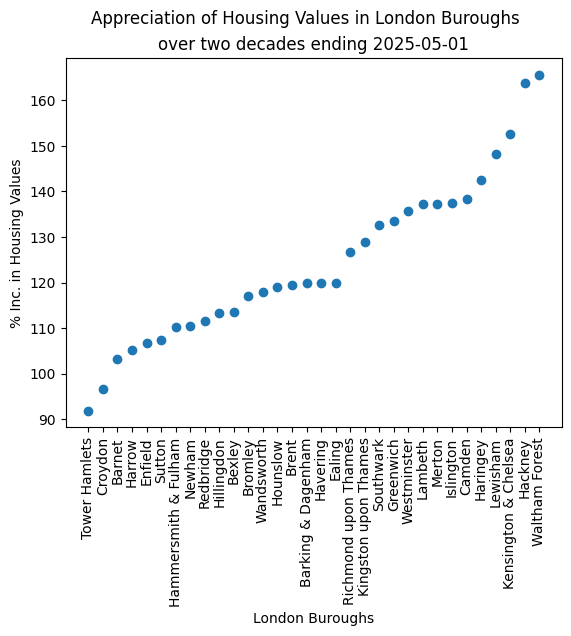

In [18]:
#plot results, show results visually

plt.scatter(periods_R['Burough'], periods_R['%_Increase'])
plt.xticks(rotation=90)
plt.xlabel('London Buroughs')
plt.ylabel('% Inc. in Housing Values')
plt.suptitle('Appreciation of Housing Values in London Buroughs')
plt.title('over two decades ending ' + str(End_Date.date()))
plt.show()

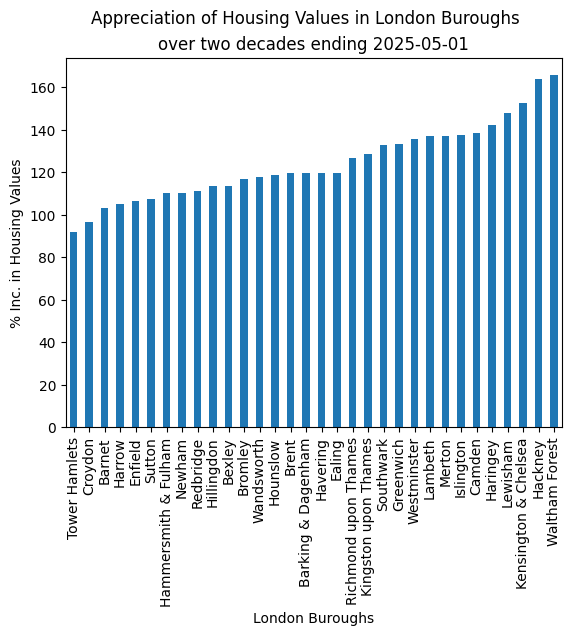

In [19]:
#Alternate way to visualize data
periods_R.plot(x="Burough", y="%_Increase", kind="bar", legend=False)
plt.xticks(rotation=90)
plt.xlabel('London Buroughs')
plt.ylabel('% Inc. in Housing Values')
plt.suptitle('Appreciation of Housing Values in London Buroughs')
plt.title('over two decades ending ' + str(End_Date.date()))
plt.show()

In [20]:
# Print the answer

print("the 5 London buroughs with the highest housing appreciations")
print("over the last two decades ending " + str(End_Date.date()))

print(periods_R[["Burough", "%_Increase"]].tail(5).to_string(index=False))

print("* the data is ordered from lowest to highest appreciation")

the 5 London buroughs with the highest housing appreciations
over the last two decades ending 2025-05-01
             Burough  %_Increase
            Haringey  142.542064
            Lewisham  148.163063
Kensington & Chelsea  152.524031
             Hackney  163.882539
      Waltham Forest  165.641353
* the data is ordered from lowest to highest appreciation
